In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

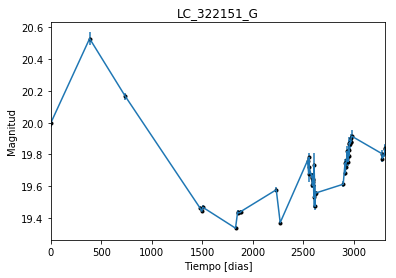

In [2]:
data = np.genfromtxt('LC_322151_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_322151_G')
plt.savefig("LC_322151_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

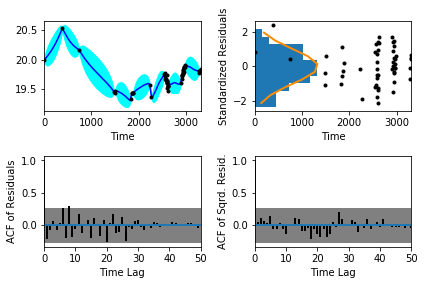

In [5]:
sample.assess_fit()

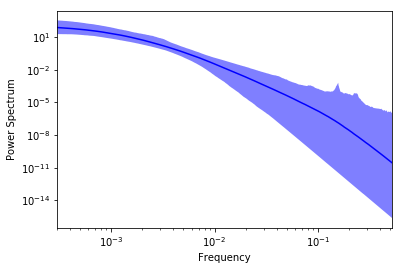

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

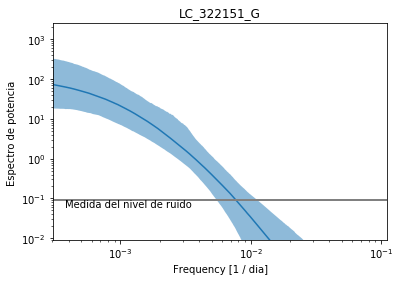

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_322151_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_322151_G')

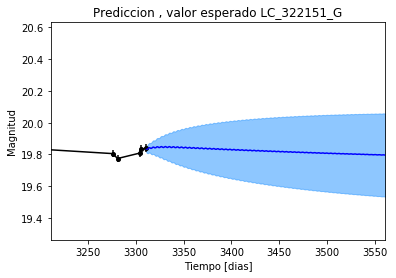

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_322151_G')

Text(0.5,1,'Prediccion, Caminos simulados_LC_322151_G')

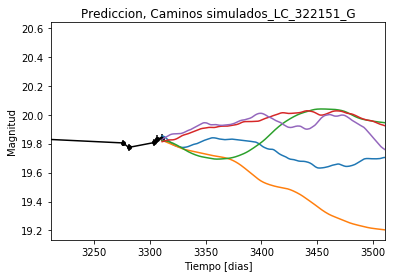

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_322151_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


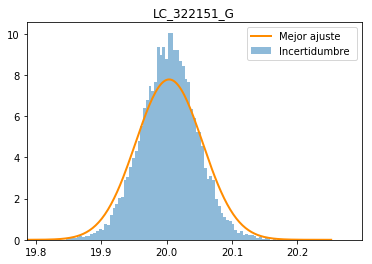

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_322151_G')
plt.savefig("Mejor_ajuste_LC_322151_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_322151_G')

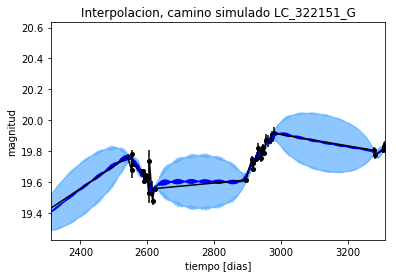

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_322151_G')

Text(0.5,1,'Interpolacion, camino simulado LC_322151_G')

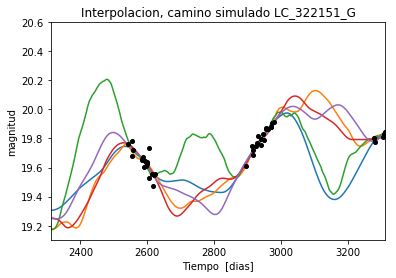

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_322151_G')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1152.1647238
Median: 0.0174425439882
Standard deviation: 0.216804992406
68% credibility interval: [ 0.00122614  0.26809787]
95% credibility interval: [  3.55485606e-04   8.23886706e-01]
99% credibility interval: [  3.18333286e-04   9.67355291e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 739.649184964
Median: 0.00240810894738
Standard deviation: 0.0772950554601
68% credibility interval: [ 0.00049568  0.02005668]
95% credibility interval: [ 0.00032505  0.2128454 ]
99% credibility interval: [  3.07890796e-04   5.70442072e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 735.554111025
Median: 0.0102855751502
Standard d

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 869.192344947
Median: 93.1840013116
Standard deviation: 1.79507737242
68% credibility interval: [ 91.2584141   94.42673168]
95% credibility interval: [ 88.71698272  95.97163299]
99% credibility interval: [ 86.87432731  98.17782547]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 358.660562208
Median: 0.596811790569
Standard deviation: 2.17016944347
68% credibility interval: [ 0.05896795  3.87742101]
95% credibility interval: [ 0.02066639  7.33500155]
99% credibility interval: [  0.01293633  10.11419384]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 652.471659739
Median: 0.812140362812
Standard deviation: 8.79218691213
68% credibility interval: [ 0.04722698  9.31704506]
95% credibility interval: [  3.20487116e

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 714.124698723
Median: 3.75770917376e-29
Standard deviation: 4.67587351602e+12
68% credibility interval: [  1.57477969e-75   5.38296728e-05]
95% credibility interval: [  5.44449424e-130   9.82640192e+000]
99% credibility interval: [  8.68756234e-138   1.32989747e+002]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1760.46914439
Median: 19.8101133568
Standard deviation: 0.194471816729
68% credibility interval: [ 19.63723029  19.97617306]
95% credibility interval: [ 19.40996621  20.20905006]
99% credibility interval: [ 19.23834198  20.4348763 ]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 398.482944549
Median: 0.00443137904154
Standard deviation: 0.251881257306
68% credibility interval: [ 0.          0.37272357]
95% credibility interval: [ 0.          0.89901727]
99% credibility interval: [ 0.          1.01250645]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 398.482944549
Median: 0.00443137904154
Standard deviation: 0.251881257306
68% credibility interval: [ 0.          0.37272357]
95% credibility interval: [ 0.          0.89901727]
99% credibility interval: [ 0.          1.01250645]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1658.62005394
Median: 0.0
Standard deviation: 0.000374290278003
68% 

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 869.192344947
Median: 93.1840013116
Standard deviation: 1.79507737242
68% credibility interval: [ 91.2584141   94.42673168]
95% credibility interval: [ 88.71698272  95.97163299]
99% credibility interval: [ 86.87432731  98.17782547]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2247.45898506
Median: 0.15246157216
Standard deviation: 0.15506982401
68% credibility interval: [ 0.09366915  0.27258711]
95% credibility interval: [ 0.05997496  0.56011397]
99% credibility interval: [ 0.04996512  0.93904629]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1268.09822665
Median: 1.33050347356
Standard deviation: 0.21782829773
68% credibility interval: [ 1.12353506  1.55903851]
95% credibility interval: [ 0.9372979   1.79045106]
99% credibility interval: [ 0.80079229  1.91975089]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 2905.08204159
Median: 0.000645536160613
Standard deviation: 0.0492758332137
68% credibility interval: [  2.99098303e-05   8.36296881e-03]
95% credibility interval: [  1.35261633e-06   4.42621245e-02]
99% credibility interval: [  2.21111215e-07   1.37125289e-01]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1152.1647238
Median: (-0.109594736106-0.0490262937246j)
Standard deviation: 2.08814148695
68% credibility interval: [-1.68450861-2.35996203j -0.00770409-1.20950147j]
95% credibility interval: [ -5.17663285e+00+0.j          -2.23358193e-03-0.95544743j]
99% credibility interval: [ -6.07807255e+00+0.j          -2.00014703e-03-0.02112719j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 739.649184964
Median: (-0.0151305947563+5.11999832678j)
Standard deviation: 1.65545769104
68% credibility interval: [-0.12601982+0.j         -0.00311447+0.03348784j]
95% credibility interval: [-1.33734709+0.05562512j -0.00204235+0.j        ]
99% credibility interval: [ -3.58419325e+00+2.75811558j  -1.93453493e-03+0.j        ]
Posterior summ